### Import all libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn import datasets
from scipy.stats.stats import kendalltau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Balanced_data_hlh.csv"

### Read CSV file of dataset

In [ ]:
df = pd.read_csv(path)
df

,GLOBALEVENTID,SQLDATE,MonthYear,FractionDate,IsRootEvent,EventCode,EventBaseCode,EventRootCode,GoldsteinScale,NumMentions,...,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_Lat,ActionGeo_Long,DATEADDED,Target
0,410400350,20150218,201502,2015.1315,1,111,111,11,-2.0,7,...,55.866700,-3.150000,4,55.866700,-3.150000,4,55.866700,-3.150000,2.015020e+13,0
1,410400566,20150218,201502,2015.1315,0,112,112,11,-2.0,2,...,47.500200,-111.301000,3,47.500200,-111.301000,3,47.500200,-111.301000,2.015020e+13,0
2,410402191,20150218,201502,2015.1315,0,130,130,13,-4.4,10,...,45.166700,15.500000,1,45.166700,15.500000,1,45.166700,15.500000,2.015020e+13,0
3,410402316,20150218,201502,2015.1315,1,130,130,13,-4.4,10,...,45.166700,15.500000,1,45.166700,15.500000,1,45.166700,15.500000,2.015020e+13,0
4,410403208,20150218,201502,2015.1315,1,1123,112,11,-2.0,2,...,27.000000,30.000000,1,27.000000,30.000000,4,32.767000,22.636700,2.015020e+13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432447,1057496940,20220806,202208,2022.5918,1,120,120,12,-4.0,2,...,51.500000,-0.116667,4,51.500000,-0.116667,4,51.500000,-0.116667,2.022080e+13,0
432448,1057496941,20220806,202208,2022.5918,1,110,110,11,-2.0,2,...,52.250000,21.000000,4,52.250000,21.000000,4,52.250000,21.000000,2.022080e+13,0
432449,1057497046,20220806,202208,2022.5918,1,130,130,13,-4.4,10,...,45.166667,15.500000,1,45.166667,15.500000,1,45.166667,15.500000,2.022080e+13,0
432450,1057499233,20220806,202208,2022.5918,0,120,120,12,-4.0,10,...,54.000000,-4.000000,1,54.000000,-4.000000,1,54.000000,-4.000000,2.022080e+13,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432452 entries, 0 to 432451
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   GLOBALEVENTID   432452 non-null  int64  
 1   SQLDATE         432452 non-null  int64  
 2   MonthYear       432452 non-null  int64  
 3   FractionDate    432452 non-null  float64
 4   IsRootEvent     432452 non-null  int64  
 5   EventCode       432452 non-null  int64  
 6   EventBaseCode   432452 non-null  int64  
 7   EventRootCode   432452 non-null  int64  
 8   GoldsteinScale  432452 non-null  float64
 9   NumMentions     432452 non-null  int64  
 10  NumSources      432452 non-null  int64  
 11  NumArticles     432452 non-null  int64  
 12  AvgTone         432452 non-null  float64
 13  Actor1Geo_Type  432452 non-null  int64  
 14  Actor1Geo_Lat   432452 non-null  float64
 15  Actor1Geo_Long  432452 non-null  float64
 16  Actor2Geo_Type  432452 non-null  int64  
 17  Actor2Geo_

In [ ]:
df.isna().sum()

GLOBALEVENTID     0
SQLDATE           0
MonthYear         0
FractionDate      0
IsRootEvent       0
EventCode         0
EventBaseCode     0
EventRootCode     0
GoldsteinScale    0
NumMentions       0
NumSources        0
NumArticles       0
AvgTone           0
Actor1Geo_Type    0
Actor1Geo_Lat     0
Actor1Geo_Long    0
Actor2Geo_Type    0
Actor2Geo_Lat     0
Actor2Geo_Long    0
ActionGeo_Type    0
ActionGeo_Lat     0
ActionGeo_Long    0
DATEADDED         0
Target            0
dtype: int64

In [ ]:
df.describe()

,GLOBALEVENTID,SQLDATE,MonthYear,FractionDate,IsRootEvent,EventCode,EventBaseCode,EventRootCode,GoldsteinScale,NumMentions,...,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_Lat,ActionGeo_Long,DATEADDED,Target
count,4.324520e+05,4.324520e+05,432452.000000,432452.000000,432452.000000,432452.000000,432452.000000,432452.000000,432452.000000,432452.000000,...,432452.000000,432452.000000,432452.000000,432452.000000,432452.000000,432452.000000,432452.000000,432452.000000,4.324520e+05,432452.000000
mean,7.569941e+08,2.018227e+07,201822.591344,2018.636053,0.661801,146.443460,117.337707,11.594459,-3.493815,6.430087,...,31.300501,-9.472748,2.851778,31.291028,-9.400206,2.852948,31.329376,-9.495303,2.018232e+13,0.453038
std,1.877463e+08,2.096803e+04,209.680291,2.078385,0.473097,169.582182,11.343093,1.107417,1.620268,5.786120,...,21.428568,74.794642,1.279359,21.440508,74.801685,1.279315,21.436037,74.772469,2.096398e+10,0.497790
min,4.104004e+08,2.015010e+07,201501.000000,2015.013700,0.000000,100.000000,100.000000,10.000000,-7.500000,1.000000,...,-85.622100,-178.983000,0.000000,-85.622100,-178.983000,0.000000,-85.622100,-178.983000,2.015020e+13,0.000000
25%,5.893072e+08,2.016101e+07,201610.000000,2016.775300,0.000000,111.000000,111.000000,11.000000,-5.000000,2.000000,...,24.908600,-79.843100,2.000000,24.908600,-79.843100,2.000000,24.998425,-79.843100,2.016100e+13,0.000000
50%,7.694720e+08,2.018070e+07,201807.000000,2018.498600,1.000000,114.000000,112.000000,11.000000,-4.000000,5.000000,...,37.571500,-0.116667,3.000000,37.566400,-0.116667,3.000000,37.669000,-0.116667,2.018070e+13,0.000000
75%,9.244583e+08,2.020052e+07,202005.000000,2020.378100,1.000000,128.000000,120.000000,12.000000,-2.000000,10.000000,...,44.040700,37.615600,4.000000,44.000000,37.615600,4.000000,44.040700,37.615600,2.020050e+13,1.000000
max,1.057500e+09,2.022081e+07,202208.000000,2022.591800,1.000000,1431.000000,145.000000,14.000000,-2.000000,418.000000,...,80.336500,179.833000,5.000000,80.336500,179.833000,5.000000,80.336500,179.833000,2.022080e+13,1.000000


### Filter 2 years data

In [ ]:
df = df.loc[df['EventRootCode']<14]

df_cropped = df.loc[df['MonthYear'] >= 202001]
df_cropped = df_cropped.loc[df_cropped['MonthYear'] <= 202112]
X = df_cropped.iloc[:,0:23]
y = df_cropped['Target']

In [ ]:
X

,GLOBALEVENTID,SQLDATE,MonthYear,FractionDate,IsRootEvent,EventCode,EventBaseCode,EventRootCode,GoldsteinScale,NumMentions,...,Actor1Geo_Type,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_Lat,ActionGeo_Long,DATEADDED
290167,896857612,20200105,202001,2020.0137,1,114,114,11,-2.0,4,...,4,-25.706900,28.229400,4,-25.706900,28.229400,4,-25.706900,28.229400,2.020010e+13
290168,896858922,20200105,202001,2020.0137,1,114,114,11,-2.0,2,...,4,-25.713000,28.365300,4,-25.713000,28.365300,4,-25.713000,28.365300,2.020010e+13
290169,896858923,20200105,202001,2020.0137,1,114,114,11,-2.0,2,...,4,-25.706900,28.229400,4,-25.706900,28.229400,4,-25.706900,28.229400,2.020010e+13
290170,896862194,20200105,202001,2020.0137,0,100,100,10,-5.0,10,...,1,60.000000,100.000000,1,60.000000,100.000000,1,60.000000,100.000000,2.020010e+13
290171,896864915,20200105,202001,2020.0137,0,110,110,11,-2.0,4,...,2,31.106000,-97.647500,2,31.106000,-97.647500,2,31.106000,-97.647500,2.020010e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431482,1055815737,20210726,202107,2021.5644,1,112,112,11,-2.0,5,...,2,44.040700,-72.709300,2,44.040700,-72.709300,2,44.040700,-72.709300,2.022070e+13
431490,1055824525,20210726,202107,2021.5644,0,130,130,13,-4.4,10,...,1,42.833333,12.833333,1,42.833333,12.833333,1,42.833333,12.833333,2.022070e+13
431574,1055935018,20210727,202107,2021.5671,1,130,130,13,-4.4,5,...,1,54.000000,-4.000000,1,54.000000,-4.000000,1,54.000000,-4.000000,2.022070e+13
431716,1056157305,20210728,202107,2021.5699,1,112,112,11,-2.0,2,...,2,40.314000,-74.508900,2,40.314000,-74.508900,2,40.314000,-74.508900,2.022070e+13


In [ ]:
y

290167    0
290168    0
290169    0
290170    1
290171    1
         ..
431482    0
431490    0
431574    1
431716    0
431789    0
Name: Target, Length: 110038, dtype: int64

In [ ]:
X.shape

(110038, 23)

In [ ]:
y.shape

(110038,)

### Correlation heatmap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


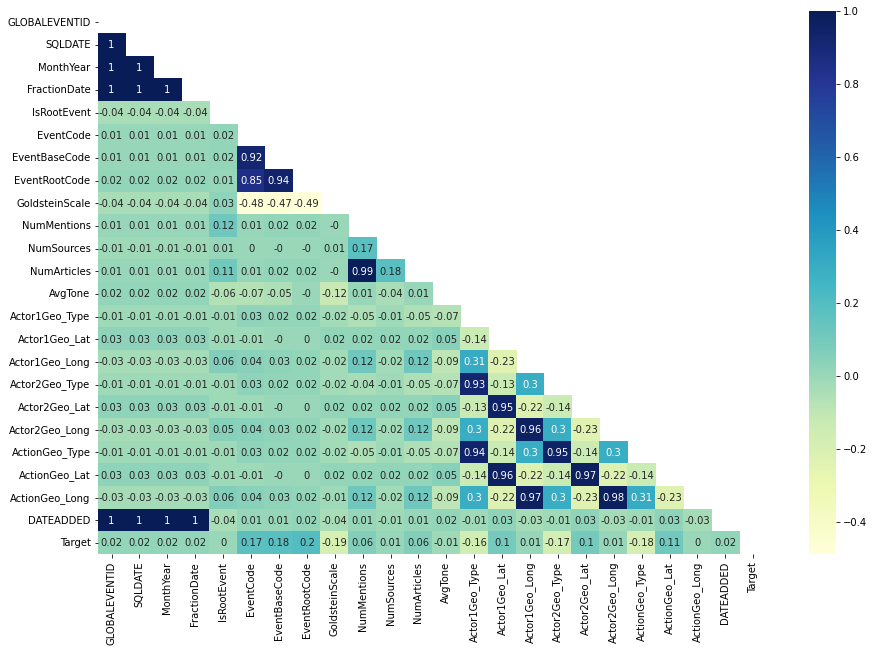

In [ ]:
correlation = df.corr(method='spearman')
correlation = correlation.round(decimals = 2)

mask = np.triu(np.ones_like(correlation, dtype=np.bool))
rcParams['figure.figsize'] = 15,10
sb.heatmap(correlation, 
           xticklabels=correlation.columns.values, 
           yticklabels=correlation.columns.values, 
           cmap="YlGnBu",
           mask = mask,
           annot=True)
plt.savefig('correlation map.png')

### Checking for balanced dataset

In [ ]:
target_balance = y.value_counts()

In [ ]:
# shows if dataset is balanced or skewed
target_balance

0    60400
1    49638
Name: Target, dtype: int64

### Test-train splitting

In [ ]:
#splitting dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Feature selection

In [ ]:
# Feature selection using RFE
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=19)
fit = rfe.fit(X_train, y_train)

print("Number of Features to be selected: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
selected_features = X.columns[(fit.get_support())]
print(selected_features)

Number of Features to be selected: 19
Selected Features: [ True  True  True  True  True  True  True False  True  True False  True
  True False  True  True False  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 4 1 1 5 1 1 2 1 1 3 1 1 1 1 1 1]
Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'FractionDate', 'IsRootEvent',
       'EventCode', 'EventBaseCode', 'GoldsteinScale', 'NumMentions',
       'NumArticles', 'AvgTone', 'Actor1Geo_Lat', 'Actor1Geo_Long',
       'Actor2Geo_Lat', 'Actor2Geo_Long', 'ActionGeo_Type', 'ActionGeo_Lat',
       'ActionGeo_Long', 'DATEADDED'],
      dtype='object')


In [ ]:
df_cropped

,GLOBALEVENTID,SQLDATE,MonthYear,FractionDate,IsRootEvent,EventCode,EventBaseCode,EventRootCode,GoldsteinScale,NumMentions,...,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_Lat,ActionGeo_Long,DATEADDED,Target
290167,896857612,20200105,202001,2020.0137,1,114,114,11,-2.0,4,...,-25.706900,28.229400,4,-25.706900,28.229400,4,-25.706900,28.229400,2.020010e+13,0
290168,896858922,20200105,202001,2020.0137,1,114,114,11,-2.0,2,...,-25.713000,28.365300,4,-25.713000,28.365300,4,-25.713000,28.365300,2.020010e+13,0
290169,896858923,20200105,202001,2020.0137,1,114,114,11,-2.0,2,...,-25.706900,28.229400,4,-25.706900,28.229400,4,-25.706900,28.229400,2.020010e+13,0
290170,896862194,20200105,202001,2020.0137,0,100,100,10,-5.0,10,...,60.000000,100.000000,1,60.000000,100.000000,1,60.000000,100.000000,2.020010e+13,1
290171,896864915,20200105,202001,2020.0137,0,110,110,11,-2.0,4,...,31.106000,-97.647500,2,31.106000,-97.647500,2,31.106000,-97.647500,2.020010e+13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431482,1055815737,20210726,202107,2021.5644,1,112,112,11,-2.0,5,...,44.040700,-72.709300,2,44.040700,-72.709300,2,44.040700,-72.709300,2.022070e+13,0
431490,1055824525,20210726,202107,2021.5644,0,130,130,13,-4.4,10,...,42.833333,12.833333,1,42.833333,12.833333,1,42.833333,12.833333,2.022070e+13,0
431574,1055935018,20210727,202107,2021.5671,1,130,130,13,-4.4,5,...,54.000000,-4.000000,1,54.000000,-4.000000,1,54.000000,-4.000000,2.022070e+13,1
431716,1056157305,20210728,202107,2021.5699,1,112,112,11,-2.0,2,...,40.314000,-74.508900,2,40.314000,-74.508900,2,40.314000,-74.508900,2.022070e+13,0


In [ ]:
#df_select = df
df_select = df_cropped
df_select.columns

Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'FractionDate', 'IsRootEvent',
       'EventCode', 'EventBaseCode', 'EventRootCode', 'GoldsteinScale',
       'NumMentions', 'NumSources', 'NumArticles', 'AvgTone', 'Actor1Geo_Type',
       'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor2Geo_Type', 'Actor2Geo_Lat',
       'Actor2Geo_Long', 'ActionGeo_Type', 'ActionGeo_Lat', 'ActionGeo_Long',
       'DATEADDED', 'Target'],
      dtype='object')

In [ ]:
# dropping the target variable and 4 features which were removed by RFE 

df_select.drop('EventRootCode',axis = 1, inplace = True)
df_select.drop('NumSources',axis = 1, inplace = True)
df_select.drop('Actor1Geo_Type',axis = 1, inplace = True)
df_select.drop('Actor2Geo_Type',axis = 1, inplace = True)

df_select.drop('Target',axis = 1, inplace = True)


In [ ]:
df_select.columns
len(df_select.columns)
df_select

,GLOBALEVENTID,SQLDATE,MonthYear,FractionDate,IsRootEvent,EventCode,EventBaseCode,GoldsteinScale,NumMentions,NumArticles,AvgTone,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_Lat,ActionGeo_Long,DATEADDED
290167,896857612,20200105,202001,2020.0137,1,114,114,-2.0,4,4,-4.861111,-25.706900,28.229400,-25.706900,28.229400,4,-25.706900,28.229400,2.020010e+13
290168,896858922,20200105,202001,2020.0137,1,114,114,-2.0,2,2,-4.861111,-25.713000,28.365300,-25.713000,28.365300,4,-25.713000,28.365300,2.020010e+13
290169,896858923,20200105,202001,2020.0137,1,114,114,-2.0,2,2,-4.861111,-25.706900,28.229400,-25.706900,28.229400,4,-25.706900,28.229400,2.020010e+13
290170,896862194,20200105,202001,2020.0137,0,100,100,-5.0,10,10,-1.033592,60.000000,100.000000,60.000000,100.000000,1,60.000000,100.000000,2.020010e+13
290171,896864915,20200105,202001,2020.0137,0,110,110,-2.0,4,4,-0.340716,31.106000,-97.647500,31.106000,-97.647500,2,31.106000,-97.647500,2.020010e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431482,1055815737,20210726,202107,2021.5644,1,112,112,-2.0,5,5,-4.318182,44.040700,-72.709300,44.040700,-72.709300,2,44.040700,-72.709300,2.022070e+13
431490,1055824525,20210726,202107,2021.5644,0,130,130,-4.4,10,10,-4.746494,42.833333,12.833333,42.833333,12.833333,1,42.833333,12.833333,2.022070e+13
431574,1055935018,20210727,202107,2021.5671,1,130,130,-4.4,5,5,-7.142857,54.000000,-4.000000,54.000000,-4.000000,1,54.000000,-4.000000,2.022070e+13
431716,1056157305,20210728,202107,2021.5699,1,112,112,-2.0,2,2,-1.704545,40.314000,-74.508900,40.314000,-74.508900,2,40.314000,-74.508900,2.022070e+13


In [ ]:
# After dropping the unnecessary columns after feature selection
X = df_select
X.shape

(110038, 19)

In [ ]:
y

290167    0
290168    0
290169    0
290170    1
290171    1
         ..
431482    0
431490    0
431574    1
431716    0
431789    0
Name: Target, Length: 110038, dtype: int64

In [ ]:
# After dropping the features, split the data into training and test again based on the new set of columns
X = df_select
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

### K-NN algorithm

In [ ]:
# Knn after doing rfe

model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Train Accuracy for knn algorithm:",accuracy_score(y_pred_train, y_train))
print("Test Accuracy for knn algorithm:",accuracy_score(y_pred_test, y_test))

Train Accuracy for knn algorithm: 0.5403385209587641
Test Accuracy for knn algorithm: 0.5382588149763722


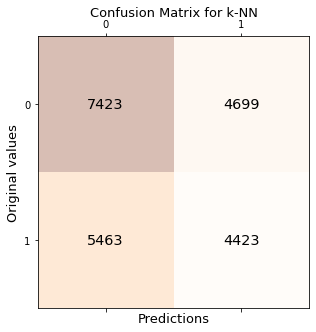

In [ ]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_test)
#
# Print the confusion matrix using Matplotlib
#
fig, axes = plt.subplots(figsize=(5, 5))
axes.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axes.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Original values', fontsize=13)
plt.title('Confusion Matrix for k-NN', fontsize=13)
plt.savefig('conf mat knn.png')
plt.show()

In [ ]:
print('Precision for knn: %.3f' % precision_score(y_test, y_pred_test))
print('Recall for knn: %.3f' % recall_score(y_test, y_pred_test))
print('F1 Score for knn: %.3f' % f1_score(y_test, y_pred_test))
print('Cohen Kappa score for knn: %.3f' % cohen_kappa_score(y_test, y_pred_test))
print ("\n\n\n")

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred_test, digits=2))

Precision for knn: 0.485
Recall for knn: 0.447
F1 Score for knn: 0.465
Cohen Kappa score for knn: 0.060




              precision    recall  f1-score   support

           0       0.58      0.61      0.59     12122
           1       0.48      0.45      0.47      9886

    accuracy                           0.54     22008
   macro avg       0.53      0.53      0.53     22008
weighted avg       0.54      0.54      0.54     22008



roc_auc_score for DecisionTree:  0.5298790304505182


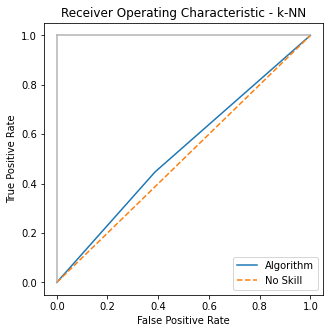

In [ ]:
# ROC curve for knn

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_test)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_pred_test))

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - k-NN')
plt.plot(false_positive_rate, true_positive_rate, label = "Algorithm")
plt.plot([0, 1], ls="--", label = 'No Skill')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### Hyperparameter tuning for k-NN

In [ ]:
# knn hyper parameter tuning

#leaf_size = [5,15,25,35,45]
p = [1,2]
# Convert to dictionary
hyperparameters = dict(p = p)
#hyperparameters = dict(leaf_size = leaf_size)
# Create new KNN object
knn_2 = KNeighborsClassifier()
# Use GridSearch
grid = GridSearchCV(knn_2, hyperparameters, cv = 3, scoring='accuracy', n_jobs=-1, verbose=1)
# Fit the model with our data
best_model = grid.fit(X,y) 
# Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])

score_df = pd.DataFrame(grid.cv_results_)
score_df.nlargest(5,"mean_test_score")

In [ ]:
# knn after parameter tuning with suggested values

model = KNeighborsClassifier(leaf_size = 5, p = 1)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Train Accuracy for knn algorithm:",accuracy_score(y_pred_train, y_train))
print("Test Accuracy for knn algorithm:",accuracy_score(y_pred_test, y_test))

Train Accuracy for knn algorithm: 0.7338861751675565
Test Accuracy for knn algorithm: 0.5868774990912395


In [ ]:
print('Precision for knn: %.3f' % precision_score(y_test, y_pred_test))
print('Recall for knn: %.3f' % recall_score(y_test, y_pred_test))
print('F1 Score for knn: %.3f' % f1_score(y_test, y_pred_test))
print('Cohen Kappa score for knn: %.3f' % cohen_kappa_score(y_test, y_pred_test))
print ("\n\n\n")

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred_test, digits=3))



Precision for knn: 0.542
Recall for knn: 0.515
F1 Score for knn: 0.528
Cohen Kappa score for knn: 0.161




              precision    recall  f1-score   support

           0      0.620     0.646     0.633     12122
           1      0.542     0.515     0.528      9886

    accuracy                          0.587     22008
   macro avg      0.581     0.580     0.580     22008
weighted avg      0.585     0.587     0.586     22008



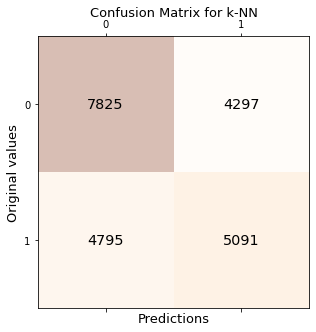

In [ ]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_test)
#
# Print the confusion matrix using Matplotlib
#
fig, axes = plt.subplots(figsize=(5, 5))
axes.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axes.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Original values', fontsize=13)
plt.title('Confusion Matrix for k-NN', fontsize=13)
plt.savefig('conf mat knn.png')
plt.show()

roc_auc_score for DecisionTree:  0.5802456033762621


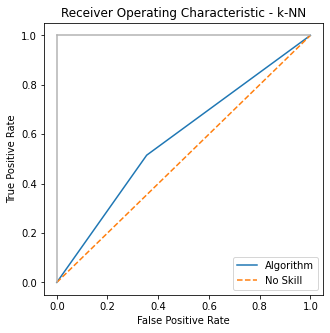

In [ ]:
# ROC curve for knn

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_test)
#false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred_test)

print('roc_auc_score for k-NN: ', roc_auc_score(y_test, y_pred_test))

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - k-NN')
plt.plot(false_positive_rate, true_positive_rate, label = "Algorithm")
plt.plot([0, 1], ls="--", label = 'No Skill')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('roc curve knn.png')
plt.show()

### Decision Tree Algorithm

In [ ]:
# decision tree

model = DecisionTreeClassifier(max_depth=30)
model = model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training Accuracy for Decision Tree algorithm:",accuracy_score(y_pred_train, y_train))
print("Test Accuracy for Decision Tree algorithm:",accuracy_score(y_pred_test, y_test))

Training Accuracy for Decision Tree algorithm: 0.9998182437805294
Test Accuracy for Decision Tree algorithm: 0.9447928026172301


In [ ]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_test)
fig, axes = plt.subplots(figsize=(5, 5))
axes.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axes.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Original values', fontsize=13)
plt.title('Confusion Matrix for Decision tree', fontsize=13)
plt.savefig('conf mat decision.png')
plt.show()

print('Precision for decision tree: %.3f' % precision_score(y_test, y_pred_test))
print('Recall for decision tree: %.3f' % recall_score(y_test, y_pred_test))
print('F1 Score for decision tree: %.3f' % f1_score(y_test, y_pred_test))
print('Cohen Kappa score for decision tree: %.3f' % cohen_kappa_score(y_test, y_pred_test))
print ("\n\n\n")
#print(confusion_matrix(y_test, y_pred_test))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred_test, digits=3))

roc_auc_score for DecisionTree:  0.9447347592950662


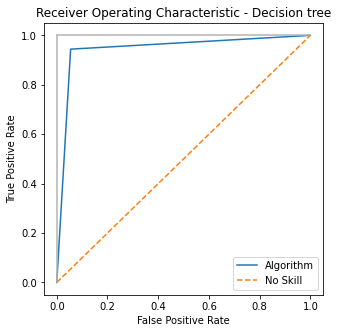

In [ ]:
# ROC curve for decision tree

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_test)
#false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred_test)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_pred_test))

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Decision tree')
plt.plot(false_positive_rate, true_positive_rate, label = "Algorithm")
plt.plot([0, 1], ls="--", label = 'No Skill')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('roc curve decision.png')
plt.show()

### Hyperparameter tuning for Decision tree

In [ ]:
# do grid search for decision tree with cross validation of cv = 5

max_depth = [30,40,50,20,60]
max_features = ['log2','sqrt',None]
criterion = ['gini', 'entropy']

hyperparameters = dict(max_depth = max_depth, max_features = max_features, criterion = criterion)
model = DecisionTreeClassifier()

random = RandomizedSearchCV(model, param_distributions = hyperparameters, cv = 5)
best_model = random.fit(X_train,y_train)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
#print('Best max_leaf_nodes:', best_model.best_estimator_.get_params()['max_leaf_nodes'])
#print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])
print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])

score_df = pd.DataFrame(best_model.cv_results_)
score_df.nlargest(5,"mean_test_score")
#score_df.nlargest(5,"mean_test_score")['params']

Best max_depth: 50
Best max_leaf_nodes: None
Best max_features: None
Best criterion: entropy


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,1.241311,0.021346,0.009076,0.001218,None,50,entropy,"{'max_features': None, 'max_depth': 50, 'crite...",0.934511,0.936442,0.936669,0.937237,0.940077,0.936987,0.001797,1
2,1.200827,0.010003,0.008398,0.000136,None,20,entropy,"{'max_features': None, 'max_depth': 20, 'crite...",0.924060,0.926389,0.925423,0.928320,0.927752,0.926389,0.001546,2
1,0.321177,0.010432,0.009229,0.000156,log2,30,entropy,"{'max_features': 'log2', 'max_depth': 30, 'cri...",0.919346,0.916335,0.910087,0.916222,0.915938,0.915586,0.003015,3
0,0.415811,0.079894,0.011523,0.001612,log2,50,entropy,"{'max_features': 'log2', 'max_depth': 50, 'cri...",0.914631,0.908838,0.912643,0.921504,0.907475,0.913018,0.004959,4
5,0.243332,0.007761,0.009403,0.000368,log2,40,gini,"{'max_features': 'log2', 'max_depth': 40, 'cri...",0.917869,0.905260,0.912189,0.917869,0.911223,0.912882,0.004713,5


In [ ]:
# Decision tree prediction after tuning

model = DecisionTreeClassifier(max_depth=50, criterion="entropy")
model = model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training Accuracy for Decision Tree algorithm:",accuracy_score(y_pred_train, y_train))
print("Test Accuracy for Decision Tree algorithm:",accuracy_score(y_pred_test, y_test))

Training Accuracy for Decision Tree algorithm: 1.0
Test Accuracy for Decision Tree algorithm: 0.9488367866230462


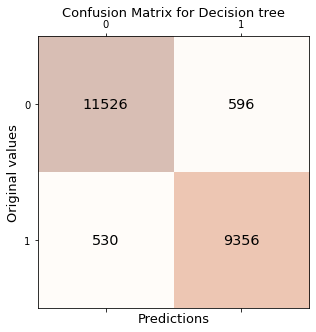

Precision for decision tree: 0.940
Recall for decision tree: 0.946
F1 Score for decision tree: 0.943
Cohen Kappa score for decision tree: 0.897




              precision    recall  f1-score   support

           0      0.956     0.951     0.953     12122
           1      0.940     0.946     0.943      9886

    accuracy                          0.949     22008
   macro avg      0.948     0.949     0.948     22008
weighted avg      0.949     0.949     0.949     22008

roc_auc_score for DecisionTree:  0.9486110142674834


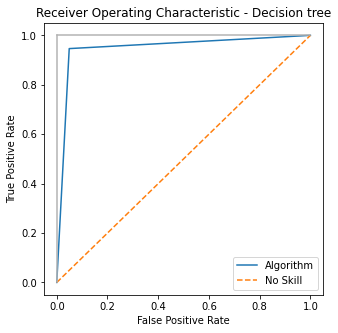

In [ ]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_test)
fig, axes = plt.subplots(figsize=(5, 5))
axes.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axes.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Original values', fontsize=13)
plt.title('Confusion Matrix for Decision tree', fontsize=13)
plt.savefig('conf mat decision.png')
plt.show()

print('Precision for decision tree: %.3f' % precision_score(y_test, y_pred_test))
print('Recall for decision tree: %.3f' % recall_score(y_test, y_pred_test))
print('F1 Score for decision tree: %.3f' % f1_score(y_test, y_pred_test))
print('Cohen Kappa score for decision tree: %.3f' % cohen_kappa_score(y_test, y_pred_test))
print ("\n\n\n")
#print(confusion_matrix(y_test, y_pred_test))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred_test, digits=3))


# ROC curve for decision tree
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_test)
#false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred_test)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_pred_test))

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Decision tree')
plt.plot(false_positive_rate, true_positive_rate, label = "Algorithm")
plt.plot([0, 1], ls="--", label = 'No Skill')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('roc curve decision.png')
plt.show()

### Logistic regression 

In [ ]:
# using logistic regression with the RFE suggested features

model = LogisticRegression()

rfe = RFE(model, n_features_to_select=19)
fit = rfe.fit(X_train, y_train)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
selected_features = X.columns[(fit.get_support())]
print(selected_features)

Num Features: 19
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'FractionDate', 'IsRootEvent',
       'EventCode', 'EventBaseCode', 'GoldsteinScale', 'NumMentions',
       'NumArticles', 'AvgTone', 'Actor1Geo_Lat', 'Actor1Geo_Long',
       'Actor2Geo_Lat', 'Actor2Geo_Long', 'ActionGeo_Type', 'ActionGeo_Lat',
       'ActionGeo_Long', 'DATEADDED'],
      dtype='object')


In [ ]:
# since same features are given, we can train model on previous dataframe

model = LogisticRegression()
model = model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training Accuracy for Logistic Regression algorithm:",accuracy_score(y_pred_train, y_train))
print("Test Accuracy for Logistic Regression algorithm:",accuracy_score(y_pred_test, y_test))
print('Precision for logistic regression: %.3f' % precision_score(y_test, y_pred_test))
print('Recall for logistic regression: %.3f' % recall_score(y_test, y_pred_test))
print('F1 Score for logistic regression: %.3f' % f1_score(y_test, y_pred_test))
print('Cohen Kappa score for logistic regression: %.3f' % cohen_kappa_score(y_test, y_pred_test))
print ("\n\n\n")
print (classification_report(y_test, y_pred_test, digits=3))

Training Accuracy for Logistic Regression algorithm: 0.5484266727252073
Test Accuracy for Logistic Regression algorithm: 0.5507997091966558
Precision for logistic regression: 0.000
Recall for logistic regression: 0.000
F1 Score for logistic regression: 0.000
Cohen Kappa score for logistic regression: 0.000




              precision    recall  f1-score   support

           0      0.551     1.000     0.710     12122
           1      0.000     0.000     0.000      9886

    accuracy                          0.551     22008
   macro avg      0.275     0.500     0.355     22008
weighted avg      0.303     0.551     0.391     22008



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

### Hyperparameter tuning for Logistic regression

In [ ]:
# paramemter tuning
param_grid =   {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                'C' : np.logspace(-4, 4, 20),
                'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                'max_iter' : [100, 1000,2500, 5000]
                }

clf = RandomizedSearchCV(model, param_distributions = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_model = clf.fit(X_train,y_train)

print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best max_iter:', best_model.best_estimator_.get_params()['max_iter'])

score_df = pd.DataFrame(best_model.cv_results_)
score_df.nlargest(5,"mean_test_score")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 459, in _check_solver
    solver
ValueError: Only 'saga' solver s

Best penalty: l1
Best C: 206.913808111479
Best solver: liblinear
Best max_iter: 100


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_penalty,param_max_iter,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,5.189111,5.627437,0.009564,0.000040,liblinear,l1,100,206.913808,"{'solver': 'liblinear', 'penalty': 'l1', 'max_...",0.635667,0.637494,0.638278,0.637146,0.001094,1
9,7.783932,1.459398,0.009933,0.000578,newton-cg,none,1000,0.088587,"{'solver': 'newton-cg', 'penalty': 'none', 'ma...",0.557763,0.552806,0.555908,0.555492,0.002045,2
5,137.827971,12.168277,0.010219,0.000747,saga,l2,2500,0.033598,"{'solver': 'saga', 'penalty': 'l2', 'max_iter'...",0.548426,0.548410,0.548444,0.548427,0.000014,3
6,297.495601,1.647424,0.011016,0.001286,saga,l1,5000,0.033598,"{'solver': 'saga', 'penalty': 'l1', 'max_iter'...",0.548426,0.548410,0.548444,0.548427,0.000014,3
7,104.806217,18.382574,0.009580,0.003221,saga,none,2500,1.623777,"{'solver': 'saga', 'penalty': 'none', 'max_ite...",0.548426,0.548410,0.548444,0.548427,0.000014,3


In [ ]:
a = score_df.nlargest(5,"mean_test_score")['params']
a

8    {'solver': 'liblinear', 'penalty': 'l1', 'max_...
9    {'solver': 'newton-cg', 'penalty': 'none', 'ma...
5    {'solver': 'saga', 'penalty': 'l2', 'max_iter'...
6    {'solver': 'saga', 'penalty': 'l1', 'max_iter'...
7    {'solver': 'saga', 'penalty': 'none', 'max_ite...
Name: params, dtype: object

In [ ]:
#Best penalty: l1
#Best C: 206.913808111479
#Best solver: liblinear
#Best max_iter: 100

# prediction after tuning 

model = LogisticRegression(penalty = 'l1', C = 206.9, solver = 'liblinear', max_iter = 100)
model = model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training Accuracy for Logistic Regression algorithm:",accuracy_score(y_pred_train, y_train))
print("Test Accuracy for Logistic Regression algorithm:",accuracy_score(y_pred_test, y_test))
print('Precision for logistic regression: %.3f' % precision_score(y_test, y_pred_test))
print('Recall for logistic regression: %.3f' % recall_score(y_test, y_pred_test))
print('F1 Score for logistic regression: %.3f' % f1_score(y_test, y_pred_test))
print('Cohen Kappa score for logistic regression: %.3f' % cohen_kappa_score(y_test, y_pred_test))
print ("\n\n\n")


Training Accuracy for Logistic Regression algorithm: 0.6360104509826195
Test Accuracy for Logistic Regression algorithm: 0.6421301344965467
Precision for logistic regression: 0.638
Recall for logistic regression: 0.469
F1 Score for logistic regression: 0.541
Cohen Kappa score for logistic regression: 0.259






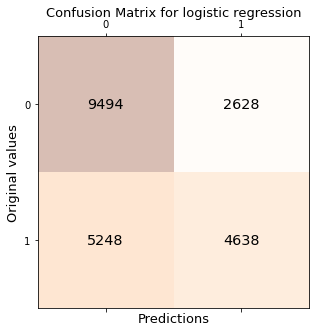

Precision for logistic regression: 0.638
Recall for logistic regression: 0.469
F1 Score for logistic regression: 0.541
Cohen Kappa score for logistic regression: 0.259




              precision    recall  f1-score   support

           0      0.644     0.783     0.707     12122
           1      0.638     0.469     0.541      9886

    accuracy                          0.642     22008
   macro avg      0.641     0.626     0.624     22008
weighted avg      0.641     0.642     0.632     22008

roc_auc_score for logistic regression:  0.6261761911229361


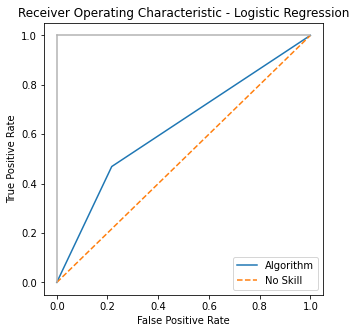

In [ ]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_test)
fig, axes = plt.subplots(figsize=(5, 5))
axes.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axes.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Original values', fontsize=13)
plt.title('Confusion Matrix for logistic regression', fontsize=13)
plt.savefig('conf mat logreg.png')
plt.show()

print('Precision for logistic regression: %.3f' % precision_score(y_test, y_pred_test))
print('Recall for logistic regression: %.3f' % recall_score(y_test, y_pred_test))
print('F1 Score for logistic regression: %.3f' % f1_score(y_test, y_pred_test))
print('Cohen Kappa score for logistic regression: %.3f' % cohen_kappa_score(y_test, y_pred_test))
print ("\n\n\n")
#print(confusion_matrix(y_test, y_pred_test))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred_test, digits=3))

# ROC curve for decision tree
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_test)
#false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred_test)

print('roc_auc_score for logistic regression: ', roc_auc_score(y_test, y_pred_test))

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate, true_positive_rate, label = "Algorithm")
plt.plot([0, 1], ls="--", label = 'No Skill')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('roc curve logreg.png')
plt.show()

### Random forest algorithm

In [ ]:
# Random forest classifier 

model = RandomForestClassifier()
model = model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training Accuracy for Random Forest Algorithm:",accuracy_score(y_pred_train, y_train))
print("Test Accuracy for Random Forest Algorithm:",accuracy_score(y_pred_test, y_test))

Training Accuracy for Random Forest Algorithm: 0.9999886402362831
Test Accuracy for Random Forest Algorithm: 0.9686023264267539


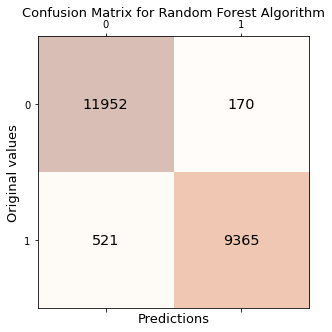

Precision for Random Forest Algorithm: 0.982
Recall for Random Forest Algorithm: 0.947
F1 Score for Random Forest Algorithm: 0.964
Cohen Kappa score for Random Forest Algorithm: 0.936




              precision    recall  f1-score   support

           0      0.958     0.986     0.972     12122
           1      0.982     0.947     0.964      9886

    accuracy                          0.969     22008
   macro avg      0.970     0.967     0.968     22008
weighted avg      0.969     0.969     0.969     22008

roc_auc_score for Random Forest Algorithm:  0.9666375612856052


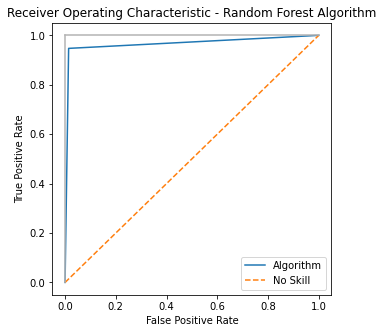

In [ ]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_test)
fig, axes = plt.subplots(figsize=(5, 5))
axes.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axes.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Original values', fontsize=13)
plt.title('Confusion Matrix for Random Forest Algorithm', fontsize=13)
plt.savefig('conf mat randfor.png')
plt.show()

print('Precision for Random Forest Algorithm: %.3f' % precision_score(y_test, y_pred_test))
print('Recall for Random Forest Algorithm: %.3f' % recall_score(y_test, y_pred_test))
print('F1 Score for Random Forest Algorithm: %.3f' % f1_score(y_test, y_pred_test))
print('Cohen Kappa score for Random Forest Algorithm: %.3f' % cohen_kappa_score(y_test, y_pred_test))
print ("\n\n\n")
#print(confusion_matrix(y_test, y_pred_test))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred_test, digits=3))

# ROC curve for decision tree
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_test)
#false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred_test)

print('roc_auc_score for Random Forest Algorithm: ', roc_auc_score(y_test, y_pred_test))

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Random Forest Algorithm')
plt.plot(false_positive_rate, true_positive_rate, label = "Algorithm")
plt.plot([0, 1], ls="--", label = 'No Skill')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('roc curve randfor.png')
plt.show()

### Hyperparameter tuning for Random forest

In [ ]:
# hyper parameter tuning

n_estimators = [150, 300, 500, 850, 1150]
max_depth = [5, 15, 25, 40, 55]
min_samples_split = [10, 15, 20, 25]

hyperparameters = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split)
model = RandomForestClassifier()
random = RandomizedSearchCV(model, param_distributions = hyperparameters, cv = 3)
best_model = random.fit(X_train,y_train)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])

score_df = pd.DataFrame(best_model.cv_results_)
score_df.nlargest(5,"mean_test_score")

Best max_depth: 25
Best min_samples_split: 10
Best n_estimators: 1150


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,156.622192,5.749358,8.450529,1.769146,1150,10,25,"{'n_estimators': 1150, 'min_samples_split': 10...",0.937466,0.941417,0.939781,0.939555,0.001621,1
1,19.523997,0.104073,0.961698,0.012275,150,10,55,"{'n_estimators': 150, 'min_samples_split': 10,...",0.936887,0.939849,0.939918,0.938884,0.001413,2
0,39.613563,0.221448,2.161753,0.475544,300,15,25,"{'n_estimators': 300, 'min_samples_split': 15,...",0.928469,0.932318,0.930989,0.930592,0.001596,3
7,108.464871,1.145230,5.018199,0.042241,850,20,40,"{'n_estimators': 850, 'min_samples_split': 20,...",0.922165,0.924922,0.924922,0.924003,0.001300,4
2,59.305697,0.830199,2.707261,0.003896,500,15,15,"{'n_estimators': 500, 'min_samples_split': 15,...",0.909147,0.911325,0.910745,0.910406,0.000921,5


In [ ]:
# prediction after tuning 
# model = RandomForestClassifier(n_estimators = 1150, max_depth = 25, min_samples_split = 10)

model = RandomForestClassifier(n_estimators = 1150)
model = model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training Accuracy for Random Forest Algorithm:",accuracy_score(y_pred_train, y_train))
print("Test Accuracy for Random Forest Algorithm:",accuracy_score(y_pred_test, y_test))

Training Accuracy for Random Forest Algorithm: 1.0
Test Accuracy for Random Forest Algorithm: 0.9711922937113777


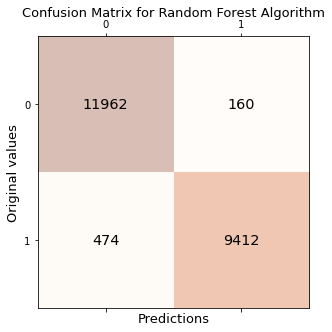

Precision for Random Forest Algorithm: 0.983
Recall for Random Forest Algorithm: 0.952
F1 Score for Random Forest Algorithm: 0.967
Cohen Kappa score for Random Forest Algorithm: 0.942




              precision    recall  f1-score   support

           0      0.962     0.987     0.974     12122
           1      0.983     0.952     0.967      9886

    accuracy                          0.971     22008
   macro avg      0.973     0.969     0.971     22008
weighted avg      0.971     0.971     0.971     22008

roc_auc_score for Random Forest Algorithm:  0.9694271334026247


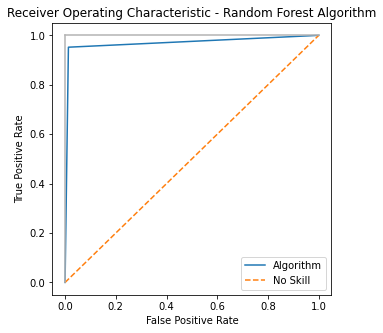

In [ ]:
# metrics

conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_test)
fig, axes = plt.subplots(figsize=(5, 5))
axes.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axes.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Original values', fontsize=13)
plt.title('Confusion Matrix for Random Forest Algorithm', fontsize=13)
plt.savefig('conf mat randfor tuned.png')
plt.show()

print('Precision for Random Forest Algorithm: %.3f' % precision_score(y_test, y_pred_test))
print('Recall for Random Forest Algorithm: %.3f' % recall_score(y_test, y_pred_test))
print('F1 Score for Random Forest Algorithm: %.3f' % f1_score(y_test, y_pred_test))
print('Cohen Kappa score for Random Forest Algorithm: %.3f' % cohen_kappa_score(y_test, y_pred_test))
print ("\n\n\n")
#print(confusion_matrix(y_test, y_pred_test))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred_test, digits=3))

# ROC curve for decision tree
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_test)
#false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred_test)

print('roc_auc_score for Random Forest Algorithm: ', roc_auc_score(y_test, y_pred_test))

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Random Forest Algorithm')
plt.plot(false_positive_rate, true_positive_rate, label = "Algorithm")
plt.plot([0, 1], ls="--", label = 'No Skill')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('roc curve randfor tuned.png')
plt.show()


### XGBoost algorithm

In [ ]:
# XG Boost
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3}
steps = 25

model = xgb.train(param, D_train, steps)
y_pred_train = model.predict(D_train)
y_pred_test = model.predict(D_test)
best_pred_train = np.asarray([np.argmax(line) for line in y_pred_train])
best_pred_test = np.asarray([np.argmax(line) for line in y_pred_test])

print("Training Accuracy for XGBoost algorithm:",accuracy_score(y_train, best_pred_train))
print("Testing Accuracy for XGBoost algorithm:",accuracy_score(y_test, best_pred_test))
print('Precision for XGBoost: %.3f' % precision_score(y_test, best_pred_test))
print('Recall for XGBoost: %.3f' % recall_score(y_test, best_pred_test))
print('F1 Score for XGBoost: %.3f' % f1_score(y_test, best_pred_test))
print('Cohen Kappa score for XGBoost: %.3f' % cohen_kappa_score(y_test, best_pred_test))
print ("\n\n\n")
#print(confusion_matrix(y_test, y_pred_test))

# Print the precision and recall, among other metrics
#print(classification_report(y_test, y_pred_test, digits=3))

Training Accuracy for XGBoost algorithm: 0.7609678518686811
Testing Accuracy for XGBoost algorithm: 0.762813522355507
Precision for XGBoost: 0.792
Recall for XGBoost: 0.640
F1 Score for XGBoost: 0.708
Cohen Kappa score for XGBoost: 0.512






In [ ]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = best_pred_test)
fig, axes = plt.subplots(figsize=(5, 5))
axes.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axes.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Original values', fontsize=13)
plt.title('Confusion Matrix for XGBoost Algorithm', fontsize=13)
plt.savefig('conf mat xgboost.png')
plt.show()
print ("\n\n\n")

# Print the precision and recall, among other metrics
#print(classification_report(y_test, y_pred_test, digits=3))

# ROC curve for decision tree
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, best_pred_test)
#false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred_test)

print('roc_auc_score for XGBoost Algorithm: ', roc_auc_score(y_test, best_pred_test))

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - XGBoost Algorithm')
plt.plot(false_positive_rate, true_positive_rate, label = "Algorithm")
plt.plot([0, 1], ls="--", label = 'No Skill')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('roc curve xgboost.png')
plt.show()

### Hyperparameter tuning for XGBoost

In [ ]:
# hyper parameter tuning

clf = xgb.XGBClassifier()
parameters = {
     "eta" : [0.25, 0.3, 0.4, 0.6] ,
     "max_depth" : [ 2, 3, 4, 5 ],
     }

random = RandomizedSearchCV(clf, parameters, n_jobs = -1, scoring="accuracy", cv=3)

best_model = random.fit(X_train, y_train)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best eta:', best_model.best_estimator_.get_params()['eta'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('Best min_child_weight:', best_model.best_estimator_.get_params()['min_child_weight'])
print('Best colsample_bytree:', best_model.best_estimator_.get_params()['colsample_bytree'])

score_df = pd.DataFrame(best_model.cv_results_)
score_df.nlargest(5,"mean_test_score")

Best max_depth: 5
Best eta: 0.25
Best gamma: 0
Best min_child_weight: 1
Best colsample_bytree: 1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_eta,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,12.906085,0.079232,0.226501,0.009007,5,0.25,"{'max_depth': 5, 'eta': 0.25}",0.819588,0.812937,0.823535,0.818687,0.004374,1
9,11.119751,2.532614,0.215084,0.029769,5,0.3,"{'max_depth': 5, 'eta': 0.3}",0.819588,0.812937,0.823535,0.818687,0.004374,1
0,10.325910,0.015912,0.181922,0.002115,4,0.4,"{'max_depth': 4, 'eta': 0.4}",0.795836,0.788808,0.796715,0.793786,0.003538,3
2,11.448414,1.620190,0.193242,0.012734,4,0.25,"{'max_depth': 4, 'eta': 0.25}",0.795836,0.788808,0.796715,0.793786,0.003538,3
5,9.229546,0.609886,0.187777,0.060284,3,0.4,"{'max_depth': 3, 'eta': 0.4}",0.776888,0.770746,0.773234,0.773623,0.002522,5


In [ ]:
# predicting with the best parameters after tuning

param = {
    'eta': 0.25, 
    'max_depth': 5,  
    'objective': 'multi:softprob',  
    'num_class': 3}
steps = 25

model = xgb.train(param, D_train, steps)
y_pred_train = model.predict(D_train)
y_pred_test = model.predict(D_test)
best_pred_train = np.asarray([np.argmax(line) for line in y_pred_train])
best_pred_test = np.asarray([np.argmax(line) for line in y_pred_test])

print("Training Accuracy for XGBoost algorithm:",accuracy_score(y_train, best_pred_train))
print("Testing Accuracy for XGBoost algorithm:",accuracy_score(y_test, best_pred_test))
print('Precision for XgBoost: %.3f' % precision_score(y_test, best_pred_test))
print('Recall for XgBoost: %.3f' % recall_score(y_test, best_pred_test))
print('F1 Score for XgBoost: %.3f' % f1_score(y_test, best_pred_test))
print('Cohen Kappa score for XgBoost: %.3f' % cohen_kappa_score(y_test, best_pred_test))
print ("\n\n\n")
print(confusion_matrix(y_test, best_pred_test))

Training Accuracy for XGBoost algorithm: 0.8080881517664432
Testing Accuracy for XGBoost algorithm: 0.8076154125772447
Precision for XgBoost: 0.854
Recall for XgBoost: 0.689
F1 Score for XgBoost: 0.763
Cohen Kappa score for XgBoost: 0.604




[[10961  1161]
 [ 3073  6813]]


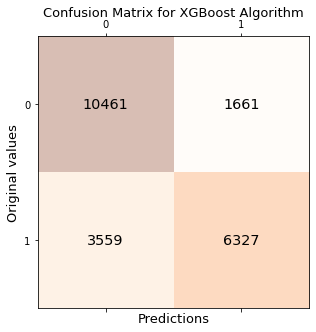





roc_auc_score for XGBoost Algorithm:  0.7514861802038704


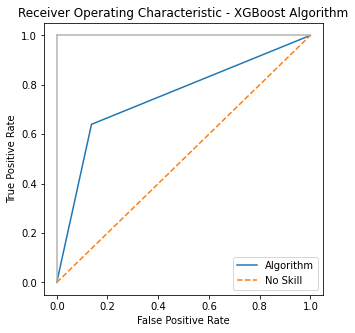

In [ ]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = best_pred_test)
fig, axes = plt.subplots(figsize=(5, 5))
axes.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axes.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Original values', fontsize=13)
plt.title('Confusion Matrix for XGBoost Algorithm', fontsize=13)
plt.savefig('conf mat xgboost tuned.png')
plt.show()
print ("\n\n\n")

# Print the precision and recall, among other metrics
print(classification_report(y_test, best_pred_test, digits=3))

# ROC curve for decision tree
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, best_pred_test)

print('roc_auc_score for XGBoost Algorithm: ', roc_auc_score(y_test, best_pred_test))

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - XGBoost Algorithm')
plt.plot(false_positive_rate, true_positive_rate, label = "Algorithm")
plt.plot([0, 1], ls="--", label = 'No Skill')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('roc curve xgboost tuned.png')
plt.show()